In [5]:
import pandas as pd # import pandas library

column_dtypes = {
    # "config:run_mode": "string",  
    # "config:monitor": "string",
    # "config:experiment": "string",  
    # "config:special": "string",  
    # "benchmark:suite": "string",  
    # "benchmark:name": "string",  
    # "run_errored": "bool",  
    "run_time:mean": "float64",  
    "run_time:user": "float64",  
    "run_time:system": "float64",  
    "wiz_metrics_pregen:time_us": "float64",  
    "wiz_metrics_pregen:bytes": "float64",  
    "wiz_metrics_load:time_us": "float64",  
    "wiz_metrics_load:bytes": "float64",  
    "wiz_metrics_load:time_per_byte": "float64",  
    "wiz_metrics_validate:time_us": "float64",  
    "wiz_metrics_validate:bytes": "float64",  
    "wiz_metrics_validate:time_per_byte": "float64",  
    "wiz_metrics_spc:in_bytes": "float64",  
    "wiz_metrics_spc:code_bytes": "float64",  
    "wiz_metrics_spc:data_bytes": "float64",  
    "wiz_metrics_spc:time_us": "float64",  
    "wiz_metrics_spc:functions": "float64",  
    "wiz_metrics_spc:time_per_byte": "float64",  
    "wiz_metrics_start:time_us": "float64",  
    "wiz_metrics_main:time_us": "float64",  
    "wiz_metrics_main:time_cycles": "float64",  
    "wiz_metrics_probes:fired": "float64",  
    "wiz_metrics_whamm:bind_time_us": "float64",  
    "wiz_metrics_whamm:report_time_us": "float64",  
    # "run_cmd": "string",  
    # "run_timed_out": "bool"
}
# df_r3 = pd.read_csv('RERUN-opts_r3.csv', low_memory=False, dtype=column_dtypes)
df_polybench = pd.read_csv('RERUN-opts_polybench.csv', low_memory=False, dtype=column_dtypes)
df = pd.concat([df_polybench])
df = df_polybench

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [7]:
WHAMM_ENGINE = 'whamm_engine'
WHAMM_REWRITE = 'whamm_rewrite'
# RUNTIME_MEASUREMENT = 'run_time:mean'
RUNTIME_MEASUREMENT = 'wiz_metrics_main:time_us'
REPORT_MEASUREMENT = 'wiz_metrics_whamm:report_time_us'

# monitor_polybench_df = df[(df['config:monitor'] == "branches") & (df['config:special'].isna())]
# engine_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_ENGINE)]
# engine_data
baseline_polybench_jit_df = df[(df['config:run_mode'] == 'base_jit') & (df['benchmark:suite'] == 'polybench')]
baseline_r3_jit_df = df[(df['config:run_mode'] == 'base_jit') & (df['benchmark:suite'] == 'r3')]
# print(baseline_polybench_jit_df)
print(baseline_r3_jit_df)

Empty DataFrame
Columns: [Unnamed: 0, run_errored, config:run_mode, config:monitor, config:experiment, config:special, benchmark:suite, benchmark:name, run_time:mean, wiz_metrics_main:time_us, wiz_metrics_whamm:bind_time_us, wiz_metrics_whamm:report_time_us, run_cmd, run_timed_out]
Index: []


In [8]:
# Baseline JIT data
baseline_polybench_jit_df = df[(df['config:run_mode'] == 'base_jit') & (df['benchmark:suite'] == 'polybench')]
baseline_r3_jit_df = df[(df['config:run_mode'] == 'base_jit') & (df['benchmark:suite'] == 'r3')]
print(baseline_polybench_jit_df)
print(baseline_r3_jit_df)

def get_monitor_df(mon):
    # Monitor data, polybench data!
    
    new_df_rows = []
    for SUITE in ["polybench", "r3"]:
        print(f"suite: {SUITE}")
        monitor_polybench_df = df[(df['config:monitor'] == mon) & (df['benchmark:suite'] == SUITE) & (df['config:special'].isna())]
        for benchmark_name in monitor_polybench_df['benchmark:name'].unique():
            if SUITE == "polybench":
                baseline_data = baseline_polybench_jit_df[baseline_polybench_jit_df['benchmark:name'] == benchmark_name]
            else:
                baseline_data = baseline_r3_jit_df[baseline_r3_jit_df['benchmark:name'] == benchmark_name]
            base_jit = baseline_data[RUNTIME_MEASUREMENT].values[0]
            
            engine_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_ENGINE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
            
            try:
                jit_rt_int = engine_data[engine_data['config:run_mode'] == 'jit-rt-int'][RUNTIME_MEASUREMENT].values[0]
                jit_rt_int_report = engine_data[engine_data['config:run_mode'] == 'jit-rt-int'][REPORT_MEASUREMENT].values[0]
                
                jit_rt_jit = engine_data[engine_data['config:run_mode'] == 'jit-rt-jit'][RUNTIME_MEASUREMENT].values[0]
                jit_rt_jit_report = engine_data[engine_data['config:run_mode'] == 'jit-rt-jit'][REPORT_MEASUREMENT].values[0]
                
                jit_wasm_int = engine_data[engine_data['config:run_mode'] == 'jit-wasm-int'][RUNTIME_MEASUREMENT].values[0]
                jit_wasm_int_report = engine_data[engine_data['config:run_mode'] == 'jit-wasm-int'][REPORT_MEASUREMENT].values[0]
                
                jit_wasm_jit = engine_data[engine_data['config:run_mode'] == 'jit-wasm-jit'][RUNTIME_MEASUREMENT].values[0]
                jit_wasm_jit_report = engine_data[engine_data['config:run_mode'] == 'jit-wasm-jit'][REPORT_MEASUREMENT].values[0]
                
                inline = engine_data[engine_data['config:run_mode'] == 'inline'][RUNTIME_MEASUREMENT].values[0]
                inline_report = engine_data[engine_data['config:run_mode'] == 'inline'][REPORT_MEASUREMENT].values[0]

                # whamm-rewrite: Pull each run config
                rewriting_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_REWRITE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
                # assert len(rewriting_data) == 2, f"found wrong number of results, expected 2: {len(rewriting_data)}"
                try:
                    rewrite_jit = rewriting_data[rewriting_data['config:run_mode'] == 'jit-default'][RUNTIME_MEASUREMENT].values[0]
                except:
                    rewrite_jit = 6e8
            
                # (Calculate relative overhead here)
                new_df_rows.append({
                    'suite': SUITE,
                    'benchmark': benchmark_name,
                    'time-jit': base_jit,
                    '$\\it{wei}$, jit-rt-int': (jit_rt_int) / base_jit,
                    '$\\it{wei}$, jit-rt-jit': (jit_rt_jit) / base_jit,
                    '$\\it{wei}$, jit-wasm-int': (jit_wasm_int) / base_jit,
                    '$\\it{wei}$, jit-wasm-jit': (jit_wasm_jit) / base_jit,
                    '$\\it{wei}$, inlined': (inline) / base_jit,
                    'Whamm rewriting, jit': rewrite_jit / base_jit,
                })
            except:
                pass
    
    
    return pd.DataFrame(new_df_rows)


branches_df = get_monitor_df('branches')
hotness_df = get_monitor_df('hotness')
icount_df = get_monitor_df('icount')
imix_df = get_monitor_df('imix')
cache_df = get_monitor_df('cache-sim')
mem_access_df = get_monitor_df('mem-access')
loop_tracer_df = get_monitor_df('loop-tracer')
basic_blocks_df = get_monitor_df('basic-blocks')
instr_coverage_df = get_monitor_df('instr-coverage')
call_graph_df = get_monitor_df('call-graph')

     Unnamed: 0  run_errored config:run_mode config:monitor config:experiment config:special benchmark:suite       benchmark:name  run_time:mean  wiz_metrics_main:time_us  wiz_metrics_whamm:bind_time_us  wiz_metrics_whamm:report_time_us                                            run_cmd run_timed_out
291        7483        False        base_jit            NaN          base-run            NaN       polybench            bicg.wasm       0.016068                    3410.0                             0.0                               0.0  /home/evgilber/git/papers/oopsla2025-whamm/eva...           NaN
293        7485        False        base_jit            NaN          base-run            NaN       polybench            symm.wasm       0.033400                   20842.6                             0.0                               0.0  /home/evgilber/git/papers/oopsla2025-whamm/eva...           NaN
295        7487        False        base_jit            NaN          base-run            NaN  

In [9]:
TARGET_SUITE = "polybench"
branches_df[branches_df['suite'] == TARGET_SUITE].sort_values('time-jit')

,suite,benchmark,time-jit,"$\it{wei}$, jit-rt-int","$\it{wei}$, jit-rt-jit","$\it{wei}$, jit-wasm-int","$\it{wei}$, jit-wasm-jit","$\it{wei}$, inlined","Whamm rewriting, jit"
11,polybench,jacobi-1d.wasm,261.4,36.624331,31.954093,6.911247,2.211936,1.145371,52.140780
6,polybench,durbin.wasm,883.4,30.514603,27.670817,5.800091,1.929364,0.871180,14.869142
24,polybench,trisolv.wasm,2275.4,8.778325,7.865694,1.963699,0.858662,0.695878,6.203041
18,polybench,gesummv.wasm,2337.2,13.243283,11.867876,2.889098,1.134862,0.734297,6.948058
0,polybench,bicg.wasm,3410.0,17.217243,15.317067,3.509853,1.281994,0.792845,4.692493
17,polybench,atax.wasm,3568.2,11.005829,9.846589,2.410179,0.956056,0.677484,4.292360
10,polybench,mvt.wasm,3596.0,16.473026,14.696274,3.439822,1.264349,0.778309,5.761290
21,polybench,gemver.wasm,3961.0,19.834890,17.411613,4.102247,1.555415,0.856501,4.349558
13,polybench,trmm.wasm,10158.8,61.263574,51.817597,11.181636,3.946549,1.621333,4.284660
7,polybench,syrk.wasm,16490.8,43.233512,38.065333,8.250928,2.812805,1.357994,3.046474


In [10]:
icount_df[icount_df['suite'] == TARGET_SUITE].sort_values('time-jit')

,suite,benchmark,time-jit,"$\it{wei}$, jit-rt-int","$\it{wei}$, jit-rt-jit","$\it{wei}$, jit-wasm-int","$\it{wei}$, jit-wasm-jit","$\it{wei}$, inlined","Whamm rewriting, jit"
11,polybench,jacobi-1d.wasm,261.4,1404.695486,1412.993114,112.673298,37.469778,18.690895,18.286151
6,polybench,durbin.wasm,883.4,1079.408196,1083.892235,89.473398,27.456192,16.574372,17.052298
24,polybench,trisolv.wasm,2275.4,291.649380,298.931616,23.575899,7.753450,3.921508,3.506021
18,polybench,gesummv.wasm,2337.2,410.249187,415.591477,33.164385,11.186291,5.150009,4.554253
0,polybench,bicg.wasm,3410.0,514.638240,522.936950,42.978240,13.646569,6.378475,5.574545
17,polybench,atax.wasm,3568.2,531.813463,536.127515,43.723558,13.891822,6.842049,6.048204
10,polybench,mvt.wasm,3596.0,543.700389,547.841991,44.370801,14.266963,6.826696,5.796385
21,polybench,gemver.wasm,3961.0,739.872002,761.570412,60.646150,20.110578,9.449381,8.255188
13,polybench,trmm.wasm,10158.8,2047.380832,2044.084577,166.947474,59.554790,24.778950,21.209257
7,polybench,syrk.wasm,16490.8,1949.218352,1960.512516,161.287942,51.843234,25.576285,21.238278


In [11]:
loop_tracer_df[loop_tracer_df['suite'] == TARGET_SUITE].sort_values('time-jit')

,suite,benchmark,time-jit,"$\it{wei}$, jit-rt-int","$\it{wei}$, jit-rt-jit","$\it{wei}$, jit-wasm-int","$\it{wei}$, jit-wasm-jit","$\it{wei}$, inlined","Whamm rewriting, jit"
11,polybench,jacobi-1d.wasm,261.4,286.660291,94.543229,226.934200,31.957154,32.601377,5.742923
6,polybench,durbin.wasm,883.4,241.650894,81.294770,185.297713,25.724247,25.955400,12.336880
24,polybench,trisolv.wasm,2275.4,67.727696,22.846796,52.592775,7.976356,7.634086,5.760306
18,polybench,gesummv.wasm,2337.2,100.459524,33.288465,78.727195,11.764077,11.586685,2.276998
0,polybench,bicg.wasm,3410.0,130.663402,43.664106,101.011906,15.456716,14.507507,2.670968
17,polybench,atax.wasm,3568.2,125.079312,41.483549,97.300936,14.913346,13.855501,2.651029
10,polybench,mvt.wasm,3596.0,123.990990,41.436652,97.257453,13.899277,13.934650,2.612347
21,polybench,gemver.wasm,3961.0,151.413532,51.138500,118.073567,17.522444,16.937945,3.314315
13,polybench,trmm.wasm,10158.8,455.919931,153.003012,363.427846,49.732626,49.912312,10.236957
7,polybench,syrk.wasm,16490.8,341.330390,112.090341,265.483894,38.546438,37.106132,15.302726


In [12]:
imix_df[imix_df['suite'] == TARGET_SUITE].sort_values('time-jit')

,suite,benchmark,time-jit,"$\it{wei}$, jit-rt-int","$\it{wei}$, jit-rt-jit","$\it{wei}$, jit-wasm-int","$\it{wei}$, jit-wasm-jit","$\it{wei}$, inlined","Whamm rewriting, jit"
11,polybench,jacobi-1d.wasm,261.4,1407.838562,1417.828615,113.078806,34.751339,15.399388,12.263198
6,polybench,durbin.wasm,883.4,1072.700928,1077.489246,89.846955,26.344578,13.686439,11.070636
24,polybench,trisolv.wasm,2275.4,289.248660,292.494594,24.208667,7.751956,3.521315,2.903929
18,polybench,gesummv.wasm,2337.2,409.518655,413.579069,36.111501,10.589766,4.705288,3.707856
0,polybench,bicg.wasm,3410.0,511.949326,518.581935,43.637537,13.640293,5.770029,4.492845
17,polybench,atax.wasm,3568.2,532.626422,533.246455,43.856006,13.297853,6.108178,4.594866
10,polybench,mvt.wasm,3596.0,535.184093,538.335873,44.150056,13.458899,6.051112,4.845495
21,polybench,gemver.wasm,3961.0,739.422116,745.013229,60.308205,18.309821,8.434587,7.068417
13,polybench,trmm.wasm,10158.8,2053.922550,2057.250935,168.450309,50.216148,22.550026,16.849352
7,polybench,syrk.wasm,16490.8,1960.302266,1958.920028,159.474713,48.669209,22.498702,18.228406


In [13]:
instr_coverage_df[instr_coverage_df['suite'] == TARGET_SUITE].sort_values('time-jit')

,suite,benchmark,time-jit,"$\it{wei}$, jit-rt-int","$\it{wei}$, jit-rt-jit","$\it{wei}$, jit-wasm-int","$\it{wei}$, jit-wasm-jit","$\it{wei}$, inlined","Whamm rewriting, jit"
11,polybench,jacobi-1d.wasm,261.4,4389.921959,4535.420811,437.780413,126.542464,34.571538,2039.120888
6,polybench,durbin.wasm,883.4,2762.462078,2833.832918,245.109350,71.324202,27.437175,716.688929
24,polybench,trisolv.wasm,2275.4,1214.013184,1038.597697,75.067153,30.624681,7.770590,320.781489
18,polybench,gesummv.wasm,2337.2,1634.161390,1675.416995,182.668235,43.410577,11.768441,240.783758
0,polybench,bicg.wasm,3410.0,1083.313783,1062.275543,82.897595,24.267742,9.275015,187.415601
17,polybench,atax.wasm,3568.2,1884.458102,1839.365843,168.476150,47.470770,18.237823,148.272014
10,polybench,mvt.wasm,3596.0,1986.659232,1756.694605,112.174027,53.100000,18.267964,154.633092
21,polybench,gemver.wasm,3961.0,2666.054077,3399.372532,305.213582,63.110982,36.841606,154.295178
13,polybench,trmm.wasm,10158.8,6779.927108,6440.318148,451.049179,168.211206,48.209867,88.887290
7,polybench,syrk.wasm,16490.8,5060.487090,4084.677275,511.054600,149.793012,47.839911,63.978182


In [14]:
hotness_df[hotness_df['suite'] == TARGET_SUITE].sort_values('time-jit')

,suite,benchmark,time-jit,"$\it{wei}$, jit-rt-int","$\it{wei}$, jit-rt-jit","$\it{wei}$, jit-wasm-int","$\it{wei}$, jit-wasm-jit","$\it{wei}$, inlined","Whamm rewriting, jit"
11,polybench,jacobi-1d.wasm,261.4,1630.848508,1601.734507,146.907422,43.308340,21.677888,695.259373
6,polybench,durbin.wasm,883.4,1235.587503,1217.769527,115.907177,32.836993,17.067014,213.294317
24,polybench,trisolv.wasm,2275.4,337.659576,338.809176,31.535203,9.380505,4.748704,88.715039
18,polybench,gesummv.wasm,2337.2,486.077015,469.552028,43.083690,12.767671,6.472617,87.048434
0,polybench,bicg.wasm,3410.0,599.312141,603.174839,55.747273,15.896774,8.004575,62.082522
17,polybench,atax.wasm,3568.2,618.725464,618.162659,55.714590,19.719130,8.149207,60.455524
10,polybench,mvt.wasm,3596.0,621.030256,614.653893,57.500334,19.527086,8.250389,60.803504
21,polybench,gemver.wasm,3961.0,856.210300,850.476849,78.921888,22.892098,11.254633,58.302045
13,polybench,trmm.wasm,10158.8,2356.173190,2315.902528,215.445505,65.327696,29.574733,42.036461
7,polybench,syrk.wasm,16490.8,2257.090353,2206.870267,210.066194,60.571858,29.217976,32.123184


In [15]:
cache_df[cache_df['suite'] == TARGET_SUITE].sort_values('time-jit')

,suite,benchmark,time-jit,"$\it{wei}$, jit-rt-int","$\it{wei}$, jit-rt-jit","$\it{wei}$, jit-wasm-int","$\it{wei}$, jit-wasm-jit","$\it{wei}$, inlined","Whamm rewriting, jit"
11,polybench,jacobi-1d.wasm,261.4,911.540168,338.756695,637.056618,74.329763,70.275440,61.291507
6,polybench,durbin.wasm,883.4,600.470681,223.374462,422.424949,46.568033,46.431967,39.583880
24,polybench,trisolv.wasm,2275.4,113.047288,40.892327,80.052826,9.469895,9.326184,7.852685
18,polybench,gesummv.wasm,2337.2,222.949427,76.238833,161.520281,18.248845,16.859661,15.594386
0,polybench,bicg.wasm,3410.0,349.953314,122.258240,254.229091,27.200762,26.022581,23.110264
17,polybench,atax.wasm,3568.2,294.576201,100.532650,216.386862,22.079144,21.896867,20.138333
10,polybench,mvt.wasm,3596.0,255.326974,87.693660,185.287152,20.348554,20.010623,18.384650
21,polybench,gemver.wasm,3961.0,436.634941,150.768745,312.467458,33.837061,35.701136,29.030043
13,polybench,trmm.wasm,10158.8,1123.226936,407.907647,774.152813,86.830452,84.402114,74.087491
7,polybench,syrk.wasm,16490.8,1166.995209,419.179919,821.963895,89.963082,86.866544,74.457297


In [16]:
call_graph_df[call_graph_df['suite'] == TARGET_SUITE].sort_values('time-jit')

,suite,benchmark,time-jit,"$\it{wei}$, jit-rt-int","$\it{wei}$, jit-rt-jit","$\it{wei}$, jit-wasm-int","$\it{wei}$, jit-wasm-jit","$\it{wei}$, inlined","Whamm rewriting, jit"
11,polybench,jacobi-1d.wasm,261.4,2.756695,1.811783,21.475134,7.748279,1.442234,8.870696
6,polybench,durbin.wasm,883.4,83.258547,12.304279,86.454834,2.974417,8.363142,8.541091
24,polybench,trisolv.wasm,2275.4,3.137910,0.837040,2.447570,1.895842,1.912719,4.479828
18,polybench,gesummv.wasm,2337.2,3.951994,3.021308,3.298990,1.623738,2.019682,2.276656
0,polybench,bicg.wasm,3410.0,1.611085,0.990323,1.899531,1.422170,3.079296,3.466452
17,polybench,atax.wasm,3568.2,1.756572,2.072361,2.847150,1.603442,0.923155,1.709433
10,polybench,mvt.wasm,3596.0,2.797275,3.463348,1.885984,0.970745,1.688765,2.677642
21,polybench,gemver.wasm,3961.0,3.640848,3.212623,2.686392,1.533552,3.029942,2.955516
13,polybench,trmm.wasm,10158.8,3.044336,3.110919,2.238552,2.462909,3.562566,5.875851
7,polybench,syrk.wasm,16490.8,3.377192,3.303236,3.451173,2.778846,3.085757,6.506755


In [17]:
for x in baseline_r3_jit_df['benchmark:name']:
    print(x)

In [18]:
for x in baseline_r3_jit_df['benchmark:name']:
    dfs = []
    for df in [branches_df, hotness_df, icount_df, imix_df, cache_df, mem_access_df, loop_tracer_df, basic_blocks_df, instr_coverage_df, call_graph_df]:
        r3 = df[df['benchmark'] == x]
        if len(r3) > 0:
            dfs.append(r3)
    try:
        df_new = pd.concat(dfs)
        print(df_new)
    except:
        print("\n\n\n@!!!!!!!!!!@@@@NO SUCCESSES FOR", x)

In [19]:
def group(x):
    if x["suite"] == "r3":
        if x["time-jit"] < 1_000:
            return 4
            time = "short"
        elif x["time-jit"] < 120_000:
            return 5
            time = "medium"
        else:
            return 6
            time = "long"
        return f"r3-{time}"
    else:
        if x["time-jit"] < 20_000:
            return 1
            time = "short"
        elif x["time-jit"] < 50_000:
            return 2
            time = "medium"
        else:
            return 3
            time = "long"
        return f"poly-{time}"

def make_thirds(all_df):
    all_df['group'] = all_df.apply(group, axis=1)
    all_df = all_df.rename(columns = {
        '$\\it{wei}$, jit-rt-int': '$\\it{wei}$, jit-rt-int',
        '$\\it{wei}$, jit-rt-jit': '$\\it{wei}$, jit-rt-jit',
        '$\\it{wei}$, jit-wasm-int': '$\\it{wei}$, jit-wasm-int',
        '$\\it{wei}$, jit-wasm-jit': '$\\it{wei}$, jit-wasm-jit',
        '$\\it{wei}$, inlined': '$\\it{wei}$, inlined',
        'Whamm rewriting, jit': '$Whamm$ rewriting, jit'
    })
    return all_df
    # mean = pd.DataFrame({
    #     "benchmark": f"{group}",
    #     "time-jit": df['time-jit'].mean(),
    #     "count": len(df),
    #     "$\omega$, jit-rt-int": df['$\\it{whamm}$, jit-rt-int'].mean(),
    #     "$\omega$, jit-rt-jit": df['$\\it{whamm}$, jit-rt-jit'].mean(),
    #     "$\omega$, jit-wasm-int": df['$\\it{whamm}$, jit-wasm-int'].mean(),
    #     "$\omega$, jit-wasm-jit": df['$\\it{whamm}$, jit-wasm-jit'].mean(),
    #     "$\omega$, inlined": df['$\\it{whamm}$, inlined'].mean(),
    #     "$\Omega$ rewriting, jit": df['Whamm rewriting, jit'].mean(),
    # } for group, df in all_df.groupby("group"))
    # mins = pd.DataFrame({
    #     "$\omega$, jit-rt-int": df['$\\it{whamm}$, jit-rt-int'].min(),
    #     "$\omega$, jit-rt-jit": df['$\\it{whamm}$, jit-rt-jit'].min(),
    #     "$\omega$, jit-wasm-int": df['$\\it{whamm}$, jit-wasm-int'].min(),
    #     "$\omega$, jit-wasm-jit": df['$\\it{whamm}$, jit-wasm-jit'].min(),
    #     "$\omega$, inlined": df['$\\it{whamm}$, inlined'].min(),
    #     "$\Omega$ rewriting, jit": df['Whamm rewriting, jit'].min(),
    # } for group, df in all_df.groupby("group"))
    # maxs = pd.DataFrame({
    #     "$\omega$, jit-rt-int": df['$\\it{whamm}$, jit-rt-int'].max(),
    #     "$\omega$, jit-rt-jit": df['$\\it{whamm}$, jit-rt-jit'].max(),
    #     "$\omega$, jit-wasm-int": df['$\\it{whamm}$, jit-wasm-int'].max(),
    #     "$\omega$, jit-wasm-jit": df['$\\it{whamm}$, jit-wasm-jit'].max(),
    #     "$\omega$, inlined": df['$\\it{whamm}$, inlined'].max(),
    #     "$\Omega$ rewriting, jit": df['Whamm rewriting, jit'].max(),
    # } for group, df in all_df.groupby("group"))
    # return mean, mins, maxs

branches_df_thirds = make_thirds(branches_df)
hotness_df_thirds = make_thirds(hotness_df)
icount_df_thirds = make_thirds(icount_df)
imix_df_thirds = make_thirds(imix_df)
cache_df_thirds = make_thirds(cache_df)
mem_access_df_thirds = make_thirds(mem_access_df)
loop_tracer_df_thirds = make_thirds(loop_tracer_df)
basic_blocks_df_thirds = make_thirds(basic_blocks_df)
instr_coverage_df_thirds = make_thirds(instr_coverage_df)
call_graph_df_thirds = make_thirds(call_graph_df)

In [20]:
cache_df[cache_df['suite'] == TARGET_SUITE]

,suite,benchmark,time-jit,"$\it{wei}$, jit-rt-int","$\it{wei}$, jit-rt-jit","$\it{wei}$, jit-wasm-int","$\it{wei}$, jit-wasm-jit","$\it{wei}$, inlined","Whamm rewriting, jit",group
0,polybench,bicg.wasm,3410.0,349.953314,122.258240,254.229091,27.200762,26.022581,23.110264,1
1,polybench,symm.wasm,20842.6,1167.913869,410.064435,835.635804,87.725620,88.456344,80.657250,2
2,polybench,gramschmidt.wasm,27177.2,1253.904045,437.437845,888.935210,93.562008,97.704738,81.785026,2
3,polybench,floyd-warshall.wasm,361043.0,1125.001871,383.270509,830.735473,84.173194,82.859166,77.406111,3
4,polybench,2mm.wasm,32855.8,1129.847759,392.440580,810.168451,85.730270,88.383573,76.841367,2
5,polybench,fdtd-2d.wasm,43413.2,1268.334484,438.172901,930.481757,95.735652,95.751486,82.054011,2
6,polybench,durbin.wasm,883.4,600.470681,223.374462,422.424949,46.568033,46.431967,39.583880,1
7,polybench,syrk.wasm,16490.8,1166.995209,419.179919,821.963895,89.963082,86.866544,74.457297,1
8,polybench,correlation.wasm,20967.6,898.162975,323.263950,622.098667,66.733007,68.484738,57.310641,2
9,polybench,ludcmp.wasm,161346.8,1545.090206,529.426338,1107.120649,124.911483,120.578914,104.710304,3


In [21]:
len(branches_df_thirds)

29

In [74]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

def plot_df_grouped(configs):
    num = len(configs)
    fig, axs = plt.subplots(num, 1, figsize=(8, 2.2 * num))
    for i, config in enumerate(configs):
        ax = axs[i]
        df, ylim, mon_name, include_benchmarks_label = config
    
        # Sort the DataFrame by 'time-jit' in increasing order
        # df_sorted = df.reindex([2, 1, 0, 5, 4, 3])
        # Reset the index to ensure the first entry is properly handled
        # df_sorted.reset_index(drop=True, inplace=True)
        # print(df.columns)
        # benches = ["polybench-short", "polybench-medium", "polybench-long", "r3-short", "r3-medium", "r3-long"]
    
        # Sort the DataFrame by 'time-jit' in increasing order
        # df_sorted = df.reindex([2, 5, 1, 4, 0, 3])
        # df_sorted = df
        # df_sorted = df.sort_values('time-jit')
        # Reset the index to ensure the first entry is properly handled
        # df_sorted.reset_index(drop=True, inplace=True)

        to_plot = ['$\\it{wei}$, jit-rt-int', '$\\it{wei}$, jit-rt-jit', '$\\it{wei}$, jit-wasm-int', '$\\it{wei}$, jit-wasm-jit', '$\\it{wei}$, inlined']
        colors = ['firebrick', 'sandybrown', 'mediumseagreen', 'royalblue', 'gold', 'indigo']
        # df_sorted[to_plot].plot(kind='bar', zorder=3, ax=ax, color=colors)
        
        # df = df[["group"] + to_plot]
        # gp = df.groupby(by="group", sort=True)
    
        # Setting y-axis to logarithmic scale (base 10)
        ax.set_yscale('log')
        ax.set_ylim(1, ylim)
        
        # to_plot = ['engine, jit-rt-int', 'engine, jit-rt-jit', 'engine, jit-wasm-int', 'engine, jit-wasm-jit', 'engine, inlined', 'rewriting, jit']
        # colors = ['sandybrown', 'firebrick', 'lightpink', 'royalblue', 'indigo', 'mediumseagreen']
        # mins = dfs[1]
        # maxs = dfs[2]
        # means = df[['$\\it{whamm}$, int-rt-int', '$\\it{whamm}$, int-rt-jit', '$\\it{whamm}$, int-tramp-int', '$\\it{whamm}$, int-tramp-jit', 'Whamm rewriting, int']]
        # errors = [[means[c] - mins[c], maxs[c] - means[c]] for c in means.columns]
        # df_sorted[order].plot(kind='bar', zorder=3, ax=ax, width=.85, color=colors, yerr=errors)
        # means = gp.mean()
        # mins = gp.min()
        # maxs = gp.max()
        # print("----")
        # print("Monitor:", mon_name)
        # print("Mins:")
        # print(mins)
        # print("Maxs:")
        # print(maxs)
        # errors = [[means[c] - mins[c], maxs[c] - means[c]] for c in to_plot]
        # errors = [[means[c] * 0, means[c] * 1.5] for c in means.columns]
        # if mon_name == 'mem-access':
        #     for e in errors:
        #         print("--")
        #         print("min")
        #         print(e[0])
        #         print("max")
        #         print(e[1])


        groups = df["group"].unique()

        offsets = np.linspace(-0.3, 0.3, len(to_plot))

        for j, group in enumerate(groups):
            for k, item in enumerate(to_plot):
                values = df[df["group"] == group][item]
                pos = j + offsets[k]
                parts = ax.violinplot(values, positions=[pos], widths=0.25, showmeans=True)

                # Color the violin body
                for pc in parts['bodies']:
                    pc.set_facecolor(colors[k])
                    # pc.set_edgecolor(colors[j])
                    pc.set_alpha(0.7)
                    pc.set_zorder(4)
                for key in ['cmeans', 'cmedians', 'cbars', 'cmins', 'cmaxes']:
                    if key in parts:
                        parts[key].set_color("black")
        
        
        # means.plot(kind='bar', zorder=3, ax=ax, width=.70, color=colors, yerr=errors, xlabel="")
        # mins = dfs[1]
        # maxs = dfs[2]
        # means = df[to_plot]
        # errors = [[means[c] - mins[c], maxs[c] - means[c]] for c in means.columns]
        # df_sorted[to_plot].plot(kind='bar', zorder=3, ax=ax, width=.80, color=colors, yerr=errors)
    
        # Set custom x-axis labels
        ax.set_xticks(range(0, len(groups)))
        if include_benchmarks_label:
            ax.set_xticklabels(["polybench-short", "polybench-medium", "polybench-long"], fontsize=12, rotation=0)  # Set the x-tick labels
            plt.xlabel('Benchmark Sub-Suite', fontsize=17, fontweight='bold')
        else:    
            ax.set_xticklabels([]) 
        if i == 0:
            # --- Build legend manually ---
            legend_handles = [Patch(facecolor=c, alpha=0.7, label=lab)
                              for c, lab in zip(colors, to_plot)]
            ax.legend(handles=legend_handles, fontsize=9, loc='upper right', ncol=2)
        # else:
        #     ax.get_legend().remove()

        ax.text(-0.4, ylim * 0.90, mon_name, fontsize=18, fontweight='bold', va='top')
    
        # handles, labels = ax.get_legend_handles_labels()
        # ax.legend(handles, col_data, loc='upper left', bbox_to_anchor=(0, 1))
        # plt.tight_layout()
        
        # Adding labels and title
        # plt.ylabel('Relative Overhead')
        # Add gridlines
        ax.grid(True, axis='y', zorder=0)
        # create second y axis label
        # ax1 = ax.twinx()
        # ax1.set_yscale('log')
        # ax1.set_ylim(ax.get_ylim())  # Set the same y-limits
        # fig.text(0.5, 0.94, f'Ω vs. Wasm-Frameworks ({mon_name})', ha='center', va='top', fontsize=13, fontweight='bold')
        # plt.title(f'Ω vs. Wasm-Frameworks ({mon_name})')
    
    fig.text(0.5, 1.01, '$\\it{wei}$ JIT Optimizations', ha='center', va='top', fontsize=20, fontweight='bold')

    # This keeps the height the same for the side-by-side rendering in the paper
    fig.text(-.003, 0.56, f' ', ha='left', va='center', fontsize=17, fontweight='bold', rotation=90)
    # Automatically adjust the layout for better spacing
    plt.tight_layout()
    
    plt.savefig(f"plots/RERUN-jit-opts-all-monitors.pdf", bbox_inches='tight')

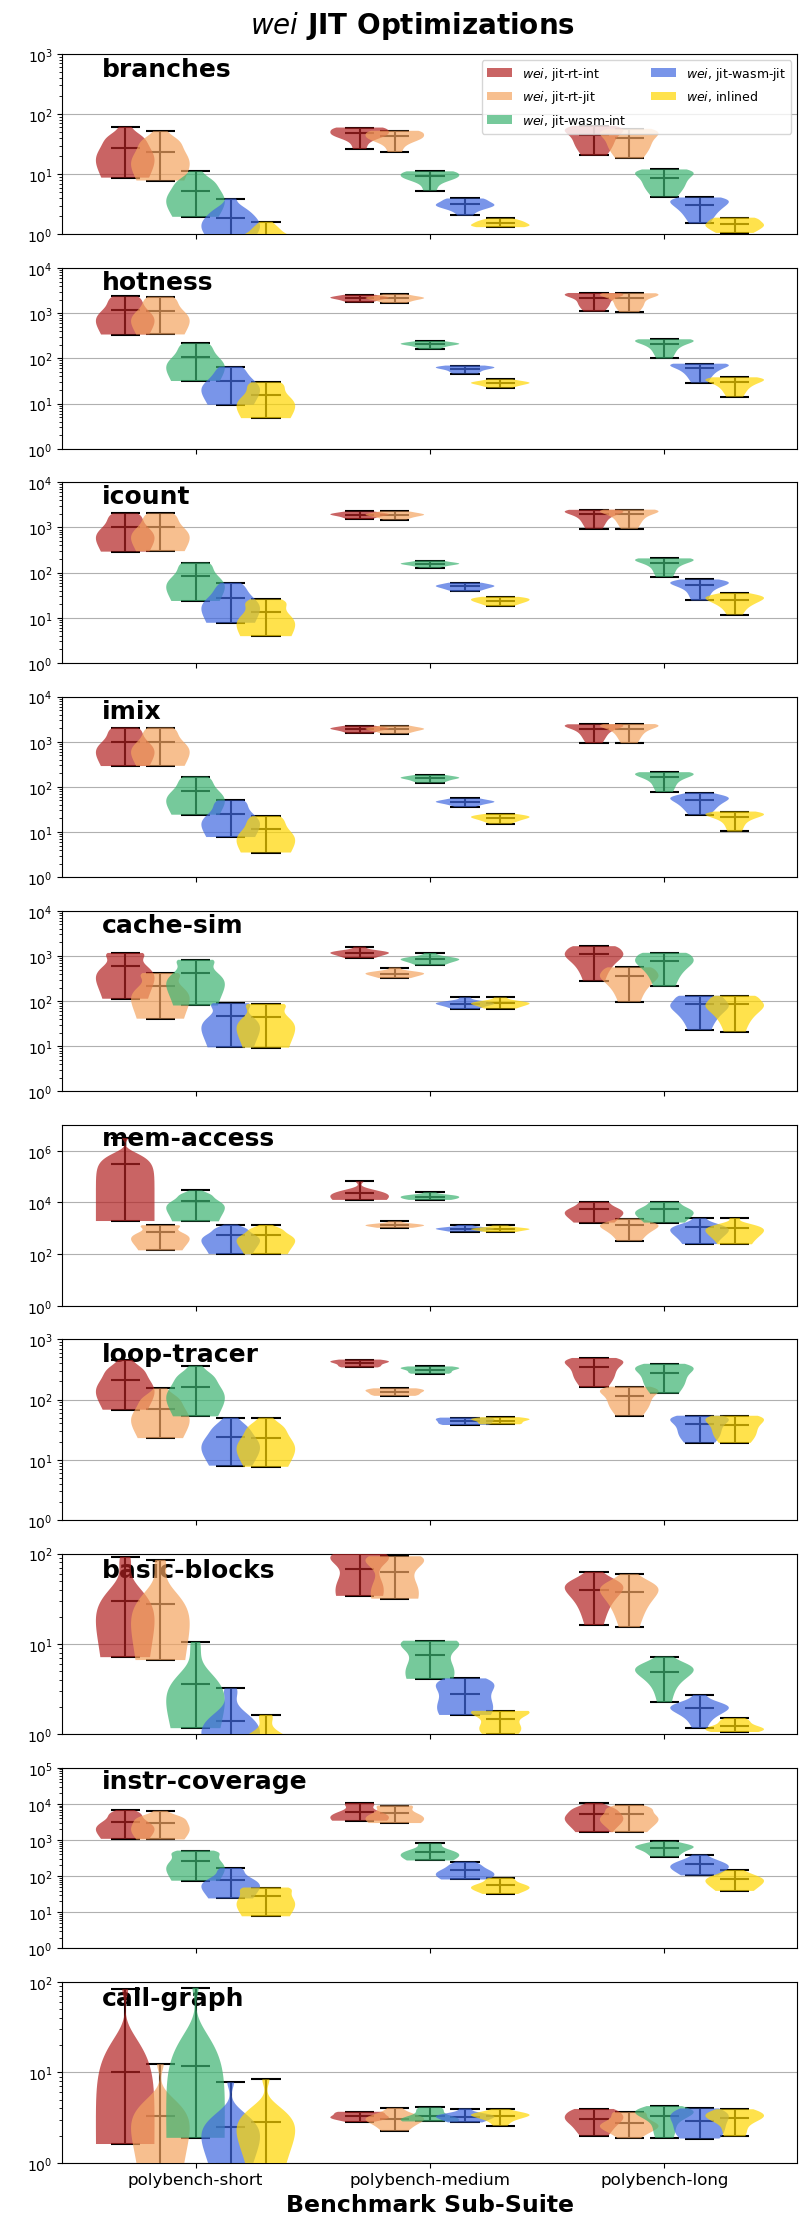

In [75]:

branches_df_thirds_cfg = (branches_df_thirds, 1e3, 'branches', False)
hotness_df_thirds_cfg = (hotness_df_thirds, 1e4, 'hotness', False)
icount_df_thirds_cfg = (icount_df_thirds, 1e4, 'icount', False)
imix_df_thirds_cfg = (imix_df_thirds, 1e4, 'imix', False)
cache_df_thirds_cfg = (cache_df_thirds, 1e4, 'cache-sim', False)
mem_access_df_thirds_cfg = (mem_access_df_thirds, 1e7, 'mem-access', False)
loop_tracer_df_thirds_cfg = (loop_tracer_df_thirds, 1e3, 'loop-tracer', False)
basic_blocks_df_thirds_cfg = (basic_blocks_df_thirds, 1e2, 'basic-blocks', False)
instr_coverage_df_thirds_cfg = (instr_coverage_df_thirds, 1e5, 'instr-coverage', False)
call_graph_df_thirds_cfg = (call_graph_df_thirds, 1e2, 'call-graph', True)
plot_df_grouped([branches_df_thirds_cfg, hotness_df_thirds_cfg, icount_df_thirds_cfg, imix_df_thirds_cfg,
                  cache_df_thirds_cfg,
                    mem_access_df_thirds_cfg, loop_tracer_df_thirds_cfg, basic_blocks_df_thirds_cfg, 
                  instr_coverage_df_thirds_cfg,
                    call_graph_df_thirds_cfg
                    ])

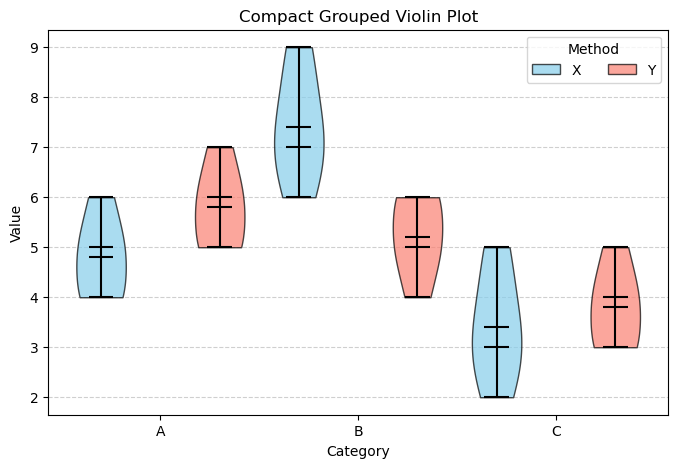

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Example dataframe: 3 categories, 2 methods per category
df = pd.DataFrame({
    "Category": ["A"]*5 + ["B"]*5 + ["C"]*5,
    "Method":   ["X"]*5 + ["X"]*5 + ["X"]*5,
    "Value":    [4,5,6,5,4, 7,8,6,7,9, 3,4,2,3,5]
})
df2 = pd.DataFrame({
    "Category": ["A"]*5 + ["B"]*5 + ["C"]*5,
    "Method":   ["Y"]*5 + ["Y"]*5 + ["Y"]*5,
    "Value":    [6,5,7,6,5, 5,6,4,5,6, 4,3,5,3,4]
})
df = pd.concat([df, df2])

categories = df["Category"].unique()
methods = df["Method"].unique()
n_categories = len(categories)
n_methods = len(methods)

# Colors for each method
method_colors = {"X": "skyblue", "Y": "salmon"}

# Figure
fig, ax = plt.subplots(figsize=(8, 5))

# Compute positions dynamically
category_centers = np.arange(n_categories)  # 0,1,2
width = 0.6  # total width per category
offsets = np.linspace(-width/2, width/2, n_methods)

# Draw violins
for i, cat in enumerate(categories):
    for j, method in enumerate(methods):
        values = df.loc[(df["Category"]==cat) & (df["Method"]==method), "Value"]
        pos = category_centers[i] + offsets[j]
        parts = ax.violinplot(values, positions=[pos], widths=0.25, showmeans=True, showmedians=True)
        
        # Color body
        for pc in parts['bodies']:
            pc.set_facecolor(method_colors[method])
            pc.set_edgecolor("black")
            pc.set_alpha(0.7)
            pc.set_zorder(3)
        
        # Color lines
        for key in ['cmeans', 'cmedians', 'cbars', 'cmins', 'cmaxes']:
            if key in parts:
                parts[key].set_color("black")
                parts[key].set_zorder(4)

# Grid behind
ax.yaxis.grid(True, linestyle="--", alpha=0.6, zorder=0)

# X-axis labels at category centers
ax.set_xticks(category_centers)
ax.set_xticklabels(categories)
ax.set_xlabel("Category")
ax.set_ylabel("Value")
ax.set_title("Compact Grouped Violin Plot")

# Build legend for methods
legend_handles = [Patch(facecolor=color, edgecolor="black", alpha=0.7, label=method)
                  for method, color in method_colors.items()]
ax.legend(handles=legend_handles, title="Method", ncol=2)

plt.show()
